In [13]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
df = pd.read_csv("/content/drive/MyDrive/대회/지역사회 대기오염 예측/dataset/TRAIN_AWS/계룡.csv")
df.head()

,연도,일시,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,0,01-01 00:00,계룡,0.154818,0.410833,0.033248,0.0,0.830
1,0,01-01 01:00,계룡,0.142180,0.148611,0.030691,0.0,0.853
2,0,01-01 02:00,계룡,0.173776,0.203889,0.040921,0.0,0.802
3,0,01-01 03:00,계룡,0.169036,0.330556,0.048593,0.0,0.816
4,0,01-01 04:00,계룡,0.169036,0.000000,0.007673,0.0,0.827


In [7]:
df.describe()

,연도,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
count,35064.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000
mean,1.501027,0.560578,0.308414,0.029329,0.001854,0.710632
std,1.118356,0.177435,0.334045,0.028995,0.013036,0.222186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.418641,0.000000,0.005115,0.000000,0.549000
50%,2.000000,0.575039,0.153056,0.020460,0.000000,0.769000
75%,3.000000,0.707741,0.640833,0.046036,0.000000,0.908000
max,3.000000,0.974724,1.000000,0.196931,0.465909,0.987000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연도       35064 non-null  int64  
 1   일시       35064 non-null  object 
 2   지점       35064 non-null  object 
 3   기온(°C)   34000 non-null  float64
 4   풍향(deg)  34000 non-null  float64
 5   풍속(m/s)  34000 non-null  float64
 6   강수량(mm)  34000 non-null  float64
 7   습도(%)    34000 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.1+ MB


In [8]:
fig = px.line(df, x=[i for i in range(len(df))], y="기온(°C)")
fig.show()

In [ ]:
fig = px.line(df, x=[i for i in range(len(df))], y="풍향(deg)")
fig.show()

In [ ]:
fig = px.line(df, x=[i for i in range(len(df))], y="풍속(m/s)")
fig.show()

In [9]:
fig = px.line(df, x=[i for i in range(len(df))], y="강수량(mm)")
fig.show()

In [11]:
fig = px.line(df, x=[i for i in range(len(df))], y="습도(%)")
fig.show()

바람 data 벡터화


In [ ]:
df['풍속(m/s)'] = df['풍속(m/s)'].fillna(df['풍속(m/s)'].interpolate())
df['풍향(deg)'] = df['풍향(deg)'].fillna(df['풍향(deg)'].interpolate())

In [ ]:
def multiple(x):
  x = x*359
  return x

In [ ]:
df['풍향(deg)'] = df['풍향(deg)'].apply(multiple)

Text(0, 0.5, 'Wind Velocity [m/s]')

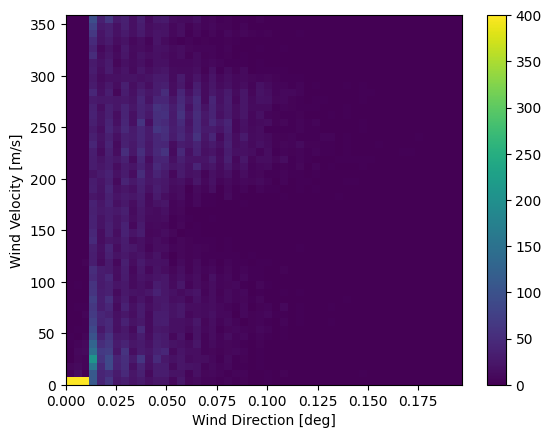

In [ ]:
plt.hist2d(df['풍속(m/s)'], df['풍향(deg)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [ ]:
wv = df['풍속(m/s)'] #풍속
wd_rad = df['풍향(deg)'] #풍향

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)


In [ ]:
df.head()

,연도,일시,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),Wx,Wy
0,0,01-01 00:00,계룡,0.154818,147.489167,0.033248,0.0,0.830,-0.032793,0.005484
1,0,01-01 01:00,계룡,0.142180,53.351389,0.030691,0.0,0.853,-0.030643,0.001708
2,0,01-01 02:00,계룡,0.173776,73.196111,0.040921,0.0,0.802,-0.024152,-0.033033
3,0,01-01 03:00,계룡,0.169036,118.669444,0.048593,0.0,0.816,0.036817,-0.031714
4,0,01-01 04:00,계룡,0.169036,0.000000,0.007673,0.0,0.827,0.007673,0.000000


In [ ]:
df['Wx'] = df['Wx'].fillna(df['Wx'].interpolate())
df['Wy'] = df['Wy'].fillna(df['Wy'].interpolate())

(-0.1687706748753046,
 0.18205997227280749,
 -0.17232908294556754,
 0.15555193182633434)

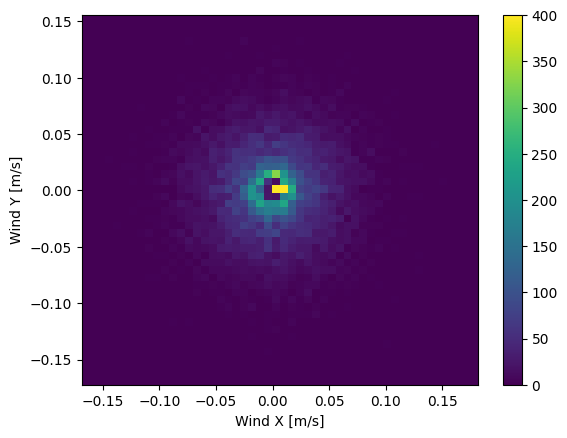

In [ ]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

##feature engineering

In [4]:
def dew_point(temp, rh):
    b = 18.678
    c = 257.14 # Celsius
    gamma = np.log(rh / 100.0) + (b * temp) / (c + temp)
    dew = (c * gamma) / (b - gamma)
    return dew

df['이슬점온도(°C)'] = df.apply(lambda row: dew_point(row['기온(°C)'], row['습도(%)']), axis=1)
df.head()

<ipython-input-4-272662d43c28>:4: RuntimeWarning: divide by zero encountered in log
  gamma = np.log(rh / 100.0) + (b * temp) / (c + temp)
<ipython-input-4-272662d43c28>:5: RuntimeWarning: invalid value encountered in double_scalars
  dew = (c * gamma) / (b - gamma)


,연도,일시,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),이슬점온도(°C)
0,0,01-01 00:00,계룡,0.154818,0.410833,0.033248,0.0,0.830,-52.399293
1,0,01-01 01:00,계룡,0.142180,0.148611,0.030691,0.0,0.853,-52.168470
2,0,01-01 02:00,계룡,0.173776,0.203889,0.040921,0.0,0.802,-52.686402
3,0,01-01 03:00,계룡,0.169036,0.330556,0.048593,0.0,0.816,-52.538669
4,0,01-01 04:00,계룡,0.169036,0.000000,0.007673,0.0,0.827,-52.421892


In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
df[['이슬점온도(°C)']] = scaler.fit_transform(df[['이슬점온도(°C)']])
df.head()

,연도,일시,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),이슬점온도(°C)
0,0,01-01 00:00,계룡,0.154818,0.410833,0.033248,0.0,0.830,0.926243
1,0,01-01 01:00,계룡,0.142180,0.148611,0.030691,0.0,0.853,0.935350
2,0,01-01 02:00,계룡,0.173776,0.203889,0.040921,0.0,0.802,0.914917
3,0,01-01 03:00,계룡,0.169036,0.330556,0.048593,0.0,0.816,0.920745
4,0,01-01 04:00,계룡,0.169036,0.000000,0.007673,0.0,0.827,0.925352


In [7]:
df.describe()

,연도,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),이슬점온도(°C)
count,35064.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,33999.000000
mean,1.501027,0.560578,0.308414,0.029329,0.001854,0.710632,0.862499
std,1.118356,0.177435,0.334045,0.028995,0.013036,0.222186,0.133282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.418641,0.000000,0.005115,0.000000,0.549000,0.796865
50%,2.000000,0.575039,0.153056,0.020460,0.000000,0.769000,0.909313
75%,3.000000,0.707741,0.640833,0.046036,0.000000,0.908000,0.966424
max,3.000000,0.974724,1.000000,0.196931,0.465909,0.987000,1.000000


In [8]:
df.corr(method='pearson')

<ipython-input-8-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,연도,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),이슬점온도(°C)
연도,1.000000,0.020057,0.063357,0.043230,-0.003254,0.029987,0.032516
기온(°C),0.020057,1.000000,0.137669,0.208980,0.082184,-0.100090,-0.054746
풍향(deg),0.063357,0.137669,1.000000,0.592218,0.009210,-0.483196,-0.450758
풍속(m/s),0.043230,0.208980,0.592218,1.000000,0.059729,-0.548785,-0.512958
강수량(mm),-0.003254,0.082184,0.009210,0.059729,1.000000,0.132295,0.118141
습도(%),0.029987,-0.100090,-0.483196,-0.548785,0.132295,1.000000,0.976455
이슬점온도(°C),0.032516,-0.054746,-0.450758,-0.512958,0.118141,0.976455,1.000000


In [9]:
df['heat_index'] = (df['기온(°C)'] * 9/5) + 32 - (0.55 - 0.0055 * df['습도(%)']) * ((df['기온(°C)'] * 9/5) + 32 - 58)
df['wind_chill'] = 13.12 + 0.6215*df['기온(°C)'] - 11.37*df['풍속(m/s)']**0.16 + 0.3965*df['기온(°C)']*df['풍속(m/s)']**0.16
df['relative_humidity'] = (np.exp((17.625 * df['이슬점온도(°C)']) / (243.04 + df['이슬점온도(°C)'])) / np.exp((17.625 * df['기온(°C)']) / (243.04 + df['기온(°C)']))) * 100
#df['precipitation_intensity'] = df['강수량(mm)'] / (df['기간(hr)']*60)

In [10]:
df.describe()

,연도,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),이슬점온도(°C),heat_index,wind_chill,relative_humidity
count,35064.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,33999.000000,34000.000000,34000.000000,33999.000000
mean,1.501027,0.560578,0.308414,0.029329,0.001854,0.710632,0.862499,46.656353,8.273100,102.214760
std,1.118356,0.177435,0.334045,0.028995,0.013036,0.222186,0.133282,0.151106,2.388861,1.676640
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.187173,4.812958,96.166583
25%,1.000000,0.418641,0.000000,0.005115,0.000000,0.549000,0.796865,46.537431,6.687397,101.058520
50%,2.000000,0.575039,0.153056,0.020460,0.000000,0.769000,0.909313,46.670154,7.524817,102.188483
75%,3.000000,0.707741,0.640833,0.046036,0.000000,0.908000,0.966424,46.773507,8.554280,103.483360
max,3.000000,0.974724,1.000000,0.196931,0.465909,0.987000,1.000000,47.056855,13.700263,106.757018


In [11]:
df.corr(method='pearson')

<ipython-input-11-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,연도,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),이슬점온도(°C),heat_index,wind_chill,relative_humidity
연도,1.000000,0.020057,0.063357,0.043230,-0.003254,0.029987,0.032516,0.013231,-0.099764,0.002724
기온(°C),0.020057,1.000000,0.137669,0.208980,0.082184,-0.100090,-0.054746,0.979587,-0.188437,-0.814185
풍향(deg),0.063357,0.137669,1.000000,0.592218,0.009210,-0.483196,-0.450758,0.229867,-0.574286,-0.370973
풍속(m/s),0.043230,0.208980,0.592218,1.000000,0.059729,-0.548785,-0.512958,0.311440,-0.708222,-0.462940
강수량(mm),-0.003254,0.082184,0.009210,0.059729,1.000000,0.132295,0.118141,0.052349,-0.037317,0.003960
습도(%),0.029987,-0.100090,-0.483196,-0.548785,0.132295,1.000000,0.976455,-0.298045,0.478157,0.646507
이슬점온도(°C),0.032516,-0.054746,-0.450758,-0.512958,0.118141,0.976455,1.000000,-0.249766,0.431797,0.624231
heat_index,0.013231,0.979587,0.229867,0.311440,0.052349,-0.298045,-0.249766,1.000000,-0.277538,-0.911706
wind_chill,-0.099764,-0.188437,-0.574286,-0.708222,-0.037317,0.478157,0.431797,-0.277538,1.000000,0.399744
relative_humidity,0.002724,-0.814185,-0.370973,-0.462940,0.003960,0.646507,0.624231,-0.911706,0.399744,1.000000


## pm 데이터

In [20]:
path = '/content/drive/MyDrive/대회/지역사회 대기오염 예측/dataset/TRAIN/'

In [21]:
csv_list = os.listdir(path)

In [22]:
len(csv_list)

17

In [23]:
for f in csv_list:
  df_tmp = pd.read_csv(path+str(f))
  print(df.head())
  print("------------------")

   연도           일시  지점    기온(°C)   풍향(deg)   풍속(m/s)  강수량(mm)  습도(%)  \
0   0  01-01 00:00  계룡  0.154818  0.410833  0.033248      0.0  0.830   
1   0  01-01 01:00  계룡  0.142180  0.148611  0.030691      0.0  0.853   
2   0  01-01 02:00  계룡  0.173776  0.203889  0.040921      0.0  0.802   
3   0  01-01 03:00  계룡  0.169036  0.330556  0.048593      0.0  0.816   
4   0  01-01 04:00  계룡  0.169036  0.000000  0.007673      0.0  0.827   

   이슬점온도(°C)  heat_index  wind_chill  relative_humidity  
0   0.926243   46.307985    6.656398         105.727522  
1   0.935350   46.294388    6.729148         105.893722  
2   0.914917   46.327452    6.451094         105.496431  
3   0.920745   46.321597    6.258067         105.576922  
4   0.925352   46.320042    8.039636         105.611933  
------------------
   연도           일시  지점    기온(°C)   풍향(deg)   풍속(m/s)  강수량(mm)  습도(%)  \
0   0  01-01 00:00  계룡  0.154818  0.410833  0.033248      0.0  0.830   
1   0  01-01 01:00  계룡  0.142180  0.148611  0.030691    